### 목표
- iris 꽃의 특징을 활용하여 품종을 분류하는 모델을 만들어보자
- knn 모델을 사용하고, 하이퍼파라미터를 조정해보자(하이퍼파라미터튜닝)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [18]:
iris_data = load_iris()

In [19]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
iris_data.data # 특성(문제)데이터

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
iris_data.target # 레이블 값 , 꽃의 품종 정보

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
iris_data.target_names #꽃 품종 이름

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
iris_data.feature_names # 꽃 특징 이름 (특성 정보)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 1. 문제정의
- iris 꽃을 분류해보자
- 지도학습 / 분류(classification)

### 2. 데이터 수집
- sklearn 내장 데이터 활용 (bunch. 딕셔너리와 유사)

### 3. 데이터 전처리
- 결측치 여부 확인 및 처리
- 데이터 단위 확인

In [26]:
iris_df=pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 4. 탐색적 데이터 분석(EDA)
- 산점도 그래프 그리기!
- Pandas 라이브러리 활용


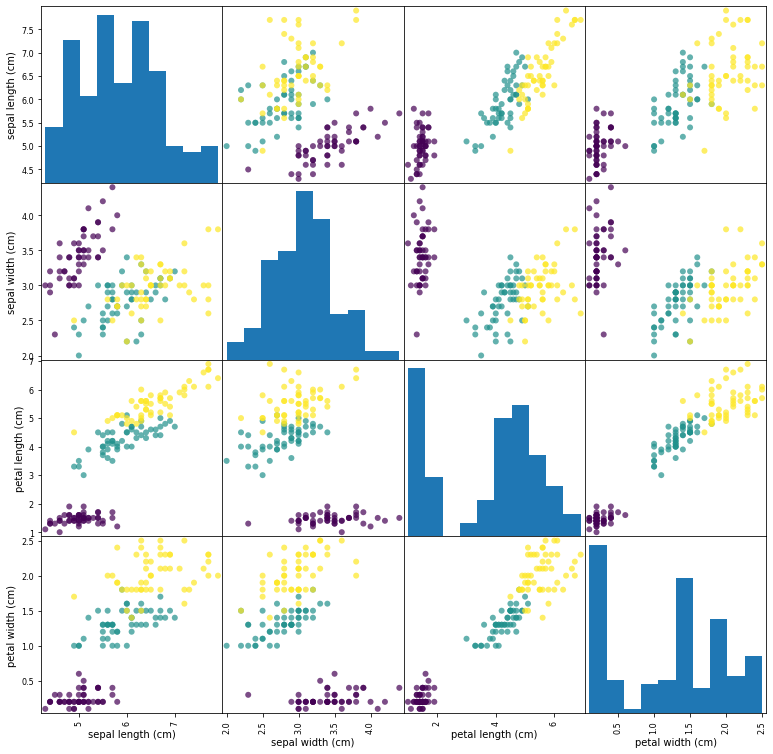

In [35]:
# 시각화
#target 값에 색 입히기(품종마다 구분 짓기)
#alphs 투명도
pd.plotting.scatter_matrix(iris_df,figsize=(13,13),marker='o',c=iris_data.target,alpha=0.7)
plt.show()

In [36]:
# 3품종(클래스)가 꽃잎과 꽃받침의 정보에 따라 비교적 잘 구분되는 것을 알 수있다.

### 5. 모델 선택

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model=KNeighborsClassifier() #모델 생성

### 6. 모델 학습
- 학습 데이터와 테스트 데이터로 분리 (7:3)

In [83]:
X_train=iris_df.iloc[:105,:]
X_test=iris_df.iloc[105:,:]
y_train=iris_data.target[:105]
y_test=iris_data.target[105:]

In [82]:
iris_df.iloc[105:,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
105,7.6,3.0,6.6,2.1
106,4.9,2.5,4.5,1.7
107,7.3,2.9,6.3,1.8
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5
110,6.5,3.2,5.1,2.0
111,6.4,2.7,5.3,1.9
112,6.8,3.0,5.5,2.1
113,5.7,2.5,5.0,2.0
114,5.8,2.8,5.1,2.4


In [77]:
iris_data.target[:105]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [79]:
iris_data.target[105:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [84]:
from sklearn.model_selection import train_test_split

In [89]:
#호출시마다 랜덤하게 무작위로 섞어서 비율에 따라 train,test를 나눠줌
#test_size=0.3->test 비율, 나머지 0.7을 train으로 사용
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,random_state=65)

#75:25 로 나눠준다
#random_start:랜덤을 고정시켜주는 숫자!(아무거나 상관없음,결과 비교하기)

In [86]:
X_train.shape,y_train.shape

((112, 4), (112,))

In [87]:
X_test.shape,y_test.shape

((38, 4), (38,))

In [90]:
model.fit(X_train,y_train)

KNeighborsClassifier()

### 7. 모델 평가

In [92]:
pre=model.predict(X_test)
# 모델이 학습을 토대로 예측한 값!!!

In [95]:
#채점하기
from sklearn import metrics

In [96]:
metrics.accuracy_score(pre,y_test)

0.9473684210526315

In [97]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      1.00      0.91        10
           2       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



##### 하이퍼 파라미터 튜닝(최적의 이웃의 수 찾아보기!)

In [102]:
train_list=[]
test_list=[]

for k in range(1, 105,2):
    # 이웃의 수 (K)에 따른 모델 생성(복잡모델 -> 단순모델)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    #score 함수->정확도
    train_score= model.score(X_train,y_train)
    train_list.append(train_score)
    
    test_score=model.score(X_test,y_test)
    test_list.append(test_score)

In [104]:
test_list

[0.9210526315789473,
 0.9210526315789473,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.8947368421052632,
 0.9473684210526315,
 0.9210526315789473,
 0.868421052631579,
 0.8947368421052632,
 0.9210526315789473,
 0.8947368421052632,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9473684210526315,
 0.9210526315789473,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.868421052631579,
 0.8947368421052632,
 0.8947368421052632,
 0.868421052631579,
 0.8947368421052632,
 0.868421052631579,
 0.868421052631579,
 0.6578947368421053,
 0.6578947368421053,
 0.5526315789473685,
 0.47368421052631576,
 0.3684210526315789,
 0.3157894736842105,
 0.3157894736842105,
 0.3157894736842105,
 0.3157894736842105,
 0.3157894736842105,
 0.31578947368421

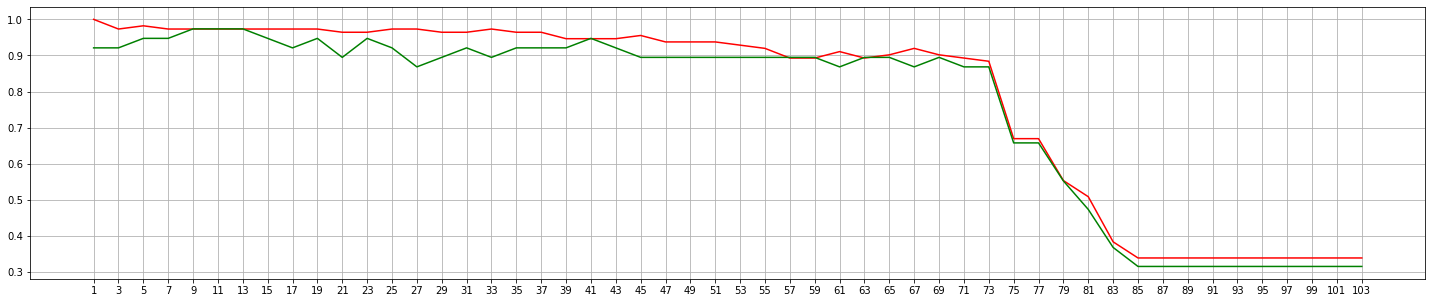

In [109]:
plt.figure(figsize=(25,5))
plt.plot(range(1,105,2),train_list, c='red')
plt.plot(range(1,105,2),test_list, c='green')
plt.xticks(range(1,105,2))
plt.grid()
plt.show()
# 초반 (k = 1,3,...)복잡한 모델링
# 높은 점수에서 점차 낮아지고 있음
# 낮아지다가 어느지점에서 성능이 매우 낮아진다
# 7~13 의 이웃이 최적의 지점이라 판단됨

### 모델 선정 및 활용

In [111]:
final_model=KNeighborsClassifier(n_neighbors=11)
final_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [112]:
final_model.score(X_test,y_test)

0.9736842105263158

In [116]:
pred=final_model.predict([[6.5,3.8,3.5,1.6]])

In [114]:
X_train

array([[6.4, 2.8, 5.6, 2.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.4, 3.7, 1.5, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [5.8, 2.6, 4. , 1.2],
       [6.9, 3.1, 4.9, 1.5],
       [4.9, 3.1, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [7.2, 3. , 5.8, 1.6],
       [6. , 2.7, 5.1, 1.6],
       [5.1, 3.8, 1.5, 0.3],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3. , 1.6, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [6.7, 3.1, 4.4, 1.4],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.5, 4. , 1.3],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.3, 1.4, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [4.5, 2.3, 1.3, 0.3],
       [6.6, 2.9, 4.6, 1.3],
       [5.8, 2.8, 5.1, 2.4],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 3. , 4.1, 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [4.3, 3. , 1.1, 0.1],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [4.6, 3

In [118]:
iris_data['target_names'][pred]

array(['versicolor'], dtype='<U10')

In [119]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')